## Análisis trekkings Santiago de Chile ⛰️🏃
Cuando me inicie en las aventuras siempre me pregunte ¿Cómo  se mide la dificultad? Dado que variables como:

*   Altura
*   Distancia
*   Desnivel
*   Duración

Me llamaban la atención, es por esto que nace este trabajo estadístico para comprender como se centra la dificultad, y como yo que he realizado Cerro la Cruz y Cerro Minillas se ve afrontado. Entonces primero debemos obtener la información, llamada técnica de webs scrapping.

Vamos a obtener toda la información con la página web de Wikiexplora.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = 'https://www.wikiexplora.com/Lagunas_del_Tordillo'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Lagunas_del_Tordillo'

Una breve explicación del código, primero debemos utilizar el paquete `BeautifulSoup` para poder extraer datos de alguna página web, al igual que el paquete `request` que nos brinda ayuda para leer **HTTP**.

Necesitamos rellenar las variables:
 * `url` con el hipervínculo donde se extrae la información, en nuestro caso la cumbre Lagunas del todillo.

* `page` utiliza la función de get de request para poder retener la información del HTTP (pagina web).

* `soup` extrae toda la información de la página web, el código, a partir de la función `BeautifulSoup` insertamos lo obtenido de `page` y nos retiene la información.

Nosotros queremos extraer la siguiente tabla de la página web 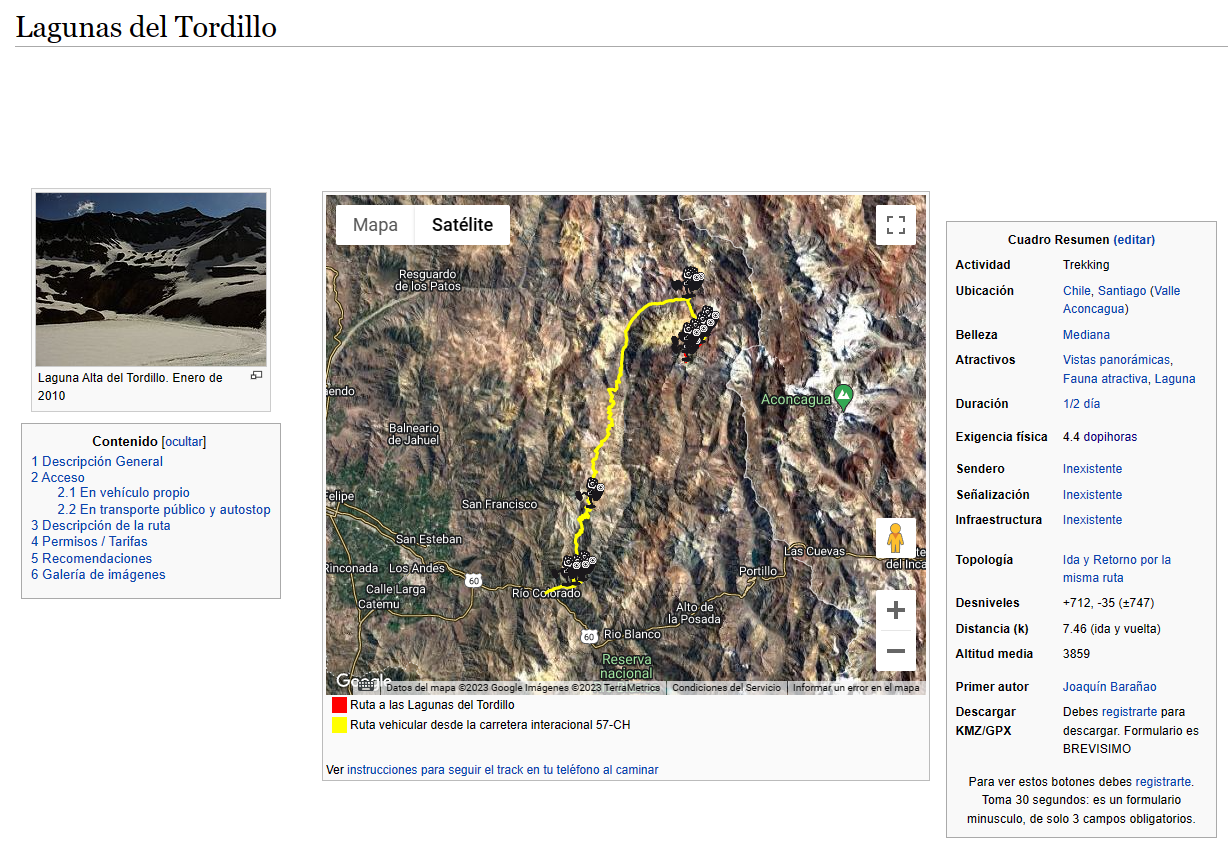

En nuestro caso nos enfrentamos a una dificultad, dado que la forma que la tabla esta imputada no es la forma estándar, pero con astucia podemos trabajar con esto.
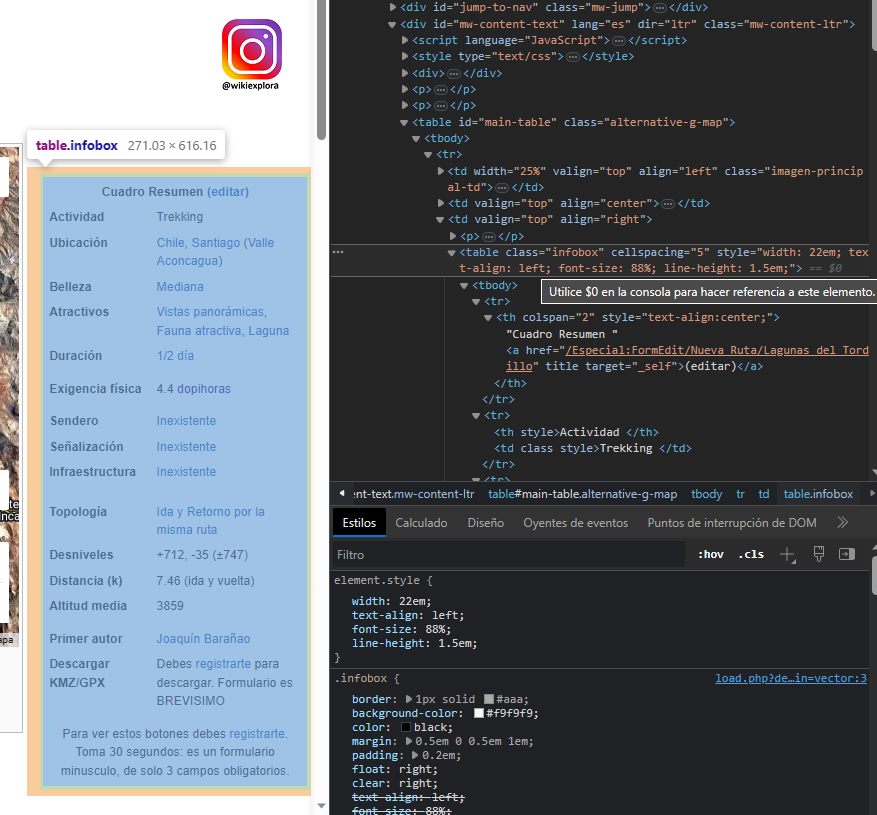

Entonces lo realizado es lo siguiente:
*   Inspeccionar el código
*   Ver `table`
* Leer la clase `infobox`

Ahora podemos separar la tabla resumen de todo el código de la página, con la variable `tabla` para la clase **infobox**

In [2]:
tabla = soup.find('table', class_ = "infobox")
# print(tabla) quitar el simbolo para leer la informacion

Vemos que está la información entre medio de más código innecesario para nuestro análisis es por esto que debemos realizar un ciclo para ordenar nuestra información, comprendemos que los datos se encuentran entre `th` y `td`

In [3]:
header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])

print(header)
for row in rows:
    print(row)

['Cuadro Resumen (editar)']
['Trekking']
['Chile, Santiago\xa0(Valle Aconcagua)']
['Mediana']
['Vistas panorámicas, Fauna atractiva, Laguna']
['1/2 día']
['']
['4.4 dopihoras']
['']
['Inexistente']
['Inexistente']
['Inexistente']
['']
['']
['Ida y Retorno por la misma ruta']
['+712, -35 (±747)']
['7.46\xa0(ida y vuelta)']
['3859']
['']
['Joaquín Barañao']
['Debes registrarte para descargar. Formulario es BREVISIMO']
['']
['Para ver estos botones debes registrarte. Toma 30 segundos: es un formulario minusculo, de solo 3 campos obligatorios.']


¡Ya estamos casi listo para poder utilizar la data!

Ahora debemos:


* Dejar los elementos almacenados en `rows` en una única lista
* Eliminar los datos vacíos
* Eliminar los otros comentarios después de la altura

In [4]:
flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]

Observemos si lo logramos...

In [5]:
flat_list

['Trekking',
 'Chile, Santiago (Valle Aconcagua)',
 'Mediana',
 'Vistas panorámicas, Fauna atractiva, Laguna',
 '1/2 día',
 '4.4 dopihoras',
 'Inexistente',
 'Inexistente',
 'Inexistente',
 'Ida y Retorno por la misma ruta',
 '+712, -35 (±747)',
 '7.46 (ida y vuelta)',
 '3859']

¡Lo hemos logrado!

Es hora de crear el DataFrame para poder almacenar los datos, entonces el siguiente paso es crear las columnas del cuadro resumen

In [6]:
Base = ['Actividad','Ubicación', 'Belleza', 'Atractivos',
       'Duración', 'Exigencia física','Sendero', 'Señalización',
       'Infraestructura', 'Topología', 'Desniveles',
       'Distancia (k)', 'Altitud media']

df = pd.DataFrame(columns = Base)
df

,Actividad,Ubicación,Belleza,Atractivos,Duración,Exigencia física,Sendero,Señalización,Infraestructura,Topología,Desniveles,Distancia (k),Altitud media


¡Excelente!

Ahora vamos a rellenar con la información previamente extraída de `flat_list`, al igual que agregar una nueva variable con el nombre.

In [7]:
df.loc['0', :] = flat_list
df['Nombre'] = nombre
df

,Actividad,Ubicación,Belleza,Atractivos,Duración,Exigencia física,Sendero,Señalización,Infraestructura,Topología,Desniveles,Distancia (k),Altitud media,Nombre
0,Trekking,"Chile, Santiago (Valle Aconcagua)",Mediana,"Vistas panorámicas, Fauna atractiva, Laguna",1/2 día,4.4 dopihoras,Inexistente,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+712, -35 (±747)",7.46 (ida y vuelta),3859,Lagunas_del_Tordillo


Felicidades, hemos terminado nuestro trabajo para la primera aventura 💪.
Ahora podemos realizar los mismos pasos para las otras bases de datos, pero en este caso con mayor velocidad 👨‍💻

## CÓDIGOS PARA TODAS LAS FILAS ⚙️

In [8]:
url = 'https://www.wikiexplora.com/Glaciar_del_Juncal'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Glaciar_del_Juncal'
tabla = soup.find('table', class_ = "infobox")


header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['1', :] = flat_list

In [9]:
url = 'https://www.wikiexplora.com/Glaciar_Alto_del_Plomo'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Glaciar_Alto_del_Plomo'
tabla = soup.find('table', class_ = "infobox")


header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['2', :] = flat_list

In [10]:
url = 'https://www.wikiexplora.com/Laguna_Cop%C3%ADn'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Laguna Copin'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['3', :] = flat_list

In [11]:
url = 'https://www.wikiexplora.com/Laguna_del_Inca'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Laguna_del_Inca'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['4', :] = flat_list

In [12]:
url = 'https://www.wikiexplora.com/Ferrocarril_Trasandino'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Ferrocarril_Trasandino'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['5', :] = flat_list
df.at['5', 'Altitud media'] = 2580

In [13]:
url = 'https://www.wikiexplora.com/ENG:Glaciar_San_Francisco_/_Monumento_Natural_el_Morado'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'San Francisco / Monumento Natural el Morado'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['6', :] = flat_list

In [14]:
url = 'https://www.wikiexplora.com/Estero_Aucayes'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Estero Aucayes'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['7', :] = flat_list

In [15]:
url = 'https://www.wikiexplora.com/Paso_Portillo_de_Piuquenes'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Paso Portillo de Piuquenes'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list.pop(4)
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['8', :] = flat_list

In [16]:
url = 'https://www.wikiexplora.com/Gran_Salto_del_R%C3%ADo_Olivares'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Gran Salto del Rio Olivares'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['9', :] = flat_list

In [17]:
url = 'https://www.wikiexplora.com/Glaciar_del_Morado'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Glaciar del Morado'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['10', :] = flat_list
df.at['10', 'Altitud media'] = 2896

In [18]:
url = 'https://www.wikiexplora.com/Cruce_Yeso_-_Cabrer%C3%ADo'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Cruce Yeso - Cabrerio'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['11', :] = flat_list
df.at['11', 'Altitud media'] = 3195

In [19]:
url = 'https://www.wikiexplora.com/Refugio_Plantat'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Refugio Plantat'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['12', :] = flat_list

In [20]:
url = 'https://www.wikiexplora.com/Laguna_Rubillas'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Laguna Rubillas'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['13', :] = flat_list

In [21]:
url = 'https://www.wikiexplora.com/Cuevas_del_Manzano'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Cuevas del Manzano'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['14', :] = flat_list
df.at['14', 'Altitud media'] = 1299

In [22]:
url = 'https://www.wikiexplora.com/Traves%C3%ADa_Lagunillas_-_San_Gabriel'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Travesia Lagunillas - San Gabriel'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['15', :] = flat_list

In [23]:
url = 'https://www.wikiexplora.com/Estero_El_Manzano'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Estero_El_Manzano'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['16', :] = flat_list
df.at['16', 'Altitud media'] = 1270

In [24]:
url = 'https://www.wikiexplora.com/Laguna_Negra'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Laguna_Negra'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['17', :] = flat_list
df.at['17', 'Altitud media'] = 2643

In [25]:
url = 'https://www.wikiexplora.com/Pirca_del_Visionario'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Pirca_del_Visionario'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['18', :] = flat_list
df.at['18', 'Altitud media'] = 2823

In [26]:
url = 'https://www.wikiexplora.com/Valle_del_Casa_de_Piedra'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Valle_del_Casa_de_Piedra'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['19', :] = flat_list

In [27]:
url = 'https://www.wikiexplora.com/Refugio_de_la_Federaci%C3%B3n,_valle_Lo_Vald%C3%A9s'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Refugio de la Federacion, valle Lo Valdes'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['20', :] = flat_list

In [28]:
url = 'https://www.wikiexplora.com/Paso_Nieves_Negras'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Paso_Nieves_Negras'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['21', :] = flat_list

In [29]:
url = 'https://www.wikiexplora.com/Mirador_De_Los_C%C3%B3ndores'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Mirador De Los Condores'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['22', :] = flat_list

In [30]:
url = 'https://www.wikiexplora.com/Lagunilla_de_la_Eme'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Lagunilla_de_la_Eme'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['23', :] = flat_list

In [31]:
url = 'https://www.wikiexplora.com/Trekking_a_la_cima_de_Torrecillas'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Trekking_a_la_cima_de_Torrecillas'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['24', :] = flat_list

In [32]:
url = 'https://www.wikiexplora.com/R%C3%ADo_Clarillo'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Rio Clarillo'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['25', :] = flat_list

In [33]:
url = 'https://www.wikiexplora.com/Caj%C3%B3n_Yeguas_Muertas'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Cajon Yeguas Muertas'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['26', :] = flat_list

In [34]:
url = 'https://www.wikiexplora.com/Cerro_Punta_Rodr%C3%ADguez'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Cerro Punta Rodriguez'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list.pop(9)
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['27', :] = flat_list

In [35]:
url = 'https://www.wikiexplora.com/Cascada_los_Vientos'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Cascada_los_Vientos'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['28', :] = flat_list

In [36]:
url = 'https://www.wikiexplora.com/San_Ram%C3%B3n_por_El_Manzano'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'San Ramon por El Manzano'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list.pop(9)
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['29', :] = flat_list
df.at['29', 'Altitud media'] = 2092

In [37]:
url = 'https://www.wikiexplora.com/Cerro_Roble_Alto'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Cerro_Roble_Alto'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list.pop(9)
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['30', :] = flat_list

In [38]:
url = 'https://www.wikiexplora.com/Laguna_del_Inca_de_Altos_de_Chicauma'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Laguna_del_Inca_de_Altos_de_Chicauma'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['31', :] = flat_list

In [39]:
url = 'https://www.wikiexplora.com/Traves%C3%ADa_Parque_Nacional_La_Campana'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
nombre = 'Travesia Parque Nacional La Campana'
tabla = soup.find('table', class_ = "infobox")

header = []
rows = []
for i, row in enumerate(tabla.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])


flat_list = [item for sublist in rows for item in sublist]
flat_list = [x for x in flat_list if x != '']
flat_list = [s.replace('\xa0', ' ') for s in flat_list]
flat_list.pop(12)
flat_list = flat_list[:13]
flat_list.append(nombre)
df.loc['32', :] = flat_list

## Continuación  - Análisis

In [40]:
df

,Actividad,Ubicación,Belleza,Atractivos,Duración,Exigencia física,Sendero,Señalización,Infraestructura,Topología,Desniveles,Distancia (k),Altitud media,Nombre
0,Trekking,"Chile, Santiago (Valle Aconcagua)",Mediana,"Vistas panorámicas, Fauna atractiva, Laguna",1/2 día,4.4 dopihoras,Inexistente,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+712, -35 (±747)",7.46 (ida y vuelta),3859,Lagunas_del_Tordillo
1,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Glaciar, Flora atractiva, ...",1 día,6.3 dopihoras,Tramos sin sendero,Insuficiente,"Cabaña(s), Camping, Inexistente",Ida y Retorno por la misma ruta,"+637, -51 (±688)",18.1 (ida y vuelta),2711,Glaciar_del_Juncal
2,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Glaciar, Río, Cascada",4 días,12.6 dopihoras,Gran parte sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1557, -86 (±1643)",31.76 (ida y vuelta),2992,Glaciar_Alto_del_Plomo
3,Trekking,"Chile, Santiago (Valle Aconcagua)",Discreta,Lago,1 día,5.7 dopihoras,Tramos sin sendero,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+741, -48 (±789)",15.12 (ida y vuelta),2149,Laguna Copin
4,"Trekking, Randonnée","Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Lago",1 día,5.5 dopihoras,Tramos sin sendero,Inexistente,"Hotel(es), Cabaña(s)",Ida y Retorno por la misma ruta,"+462, -413 (±875)",12.11 (ida y vuelta),2894,Laguna_del_Inca
5,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Fauna atractiva, Patrimoni...",1/2 día,1.9 dopihoras,Siempre Claro,Inexistente,Inexistente,Cruce,"+10, -510",6.6,2580,Ferrocarril_Trasandino
6,Trekking,"Chile (english), Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Glaciar, Río, Formación Ge...",1 día,5.1 dopihoras,Siempre Claro,Suficiente,"Cabaña(s), Hospedaje(s)",Ida y Retorno por la misma ruta,"+674, -58 (±732)",13.2 (round trip),2241,San Francisco / Monumento Natural el Morado
7,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Bosque, Río",1 día,4.9 dopihoras,Tramos sin sendero,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+711, -178 (±889)",11.12 (ida y vuelta),1479,Estero Aucayes
8,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Fuente Termal, Río",1 día,6.6 dopihoras,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1085, -39 (±1124)",11.984 (ida y vuelta),3468,Paso Portillo de Piuquenes
9,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Glaciar, Río, Cascada, Parque Nacional",4 días,17 dopihoras,Gran parte sin sendero,Adecuado,Inexistente,Ida y Retorno por la misma ruta,"+1148, -348 (±1496)",55 (ida y vuelta),2447,Gran Salto del Rio Olivares


In [41]:
item_counts = df["Belleza"].value_counts()
print(item_counts)

Belleza
Atractiva        16
Mediana          14
Discreta          2
Impresionante     1
Name: count, dtype: int64


In [42]:
item_counts = df["Ubicación"].value_counts(normalize=True)
print(item_counts)
0.696970 +  0.030303

Ubicación
Chile, Santiago (Valle Maipo)              0.696970
Chile, Santiago (Valle Aconcagua)          0.181818
Chile, Santiago (Cordillera Costa)         0.090909
Chile (english), Santiago (Valle Maipo)    0.030303
Name: proportion, dtype: float64


0.727273

¡Obervamos que, la mayoría de los trekkings están en el Valle Maipo (El cajón para los conocidos) con un 72% de toda la base!


Otra cosa que podemos ver es como Belleza que se repite es más es la Atractiva y que solo un hay un Impresionante.

In [43]:
df.loc[df['Belleza'] == 'Impresionante'].index[0]

'26'

Así es, en la posición de la fila 26 se encuentra nuestro trekking impresionante, el cual corresponde a **Cajón Yeguas Muertas** que se encuentra en el Valle Maipo


¡Vamos a tener que ver si la calificación es cierta! 😝



🔎 Al parecer la variable `Exigencia física` me puede responder mi pregunta de como se mide la dificultad

In [44]:
df.sort_values('Exigencia física', ascending = False)

,Actividad,Ubicación,Belleza,Atractivos,Duración,Exigencia física,Sendero,Señalización,Infraestructura,Topología,Desniveles,Distancia (k),Altitud media,Nombre
27,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Glaciar, Río",2 días,9.5 dopihoras,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1527, -444 (±1971)",15.309 (ida y vuelta),2774,Cerro Punta Rodriguez
31,Trekking,"Chile, Santiago (Cordillera Costa)",Atractiva,"Vistas panorámicas, Bosque, Flora atractiva, L...",1 día,8.5 dopihoras,Siempre Claro,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+1535, -33 (±1568)",19.4 (ida y vuelta),1119,Laguna_del_Inca_de_Altos_de_Chicauma
12,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Vistas panorámicas, Río, Patrimonio Cultural",1 día,8 dopihoras,Tramos sin sendero,Inexistente,Refugio(s),Ida y Retorno por la misma ruta,"+1274, -46 (±1320)",17.17 (ida y vuelta),2846,Refugio Plantat
25,Trekking,"Chile, Santiago (Valle Maipo)",Discreta,"Bosque, Río",3/4 día,7.8 dopihoras,Siempre Claro,Insuficiente,Camping,Ida y Retorno por la misma ruta,"+961, -907 (±1868)",11.88 (ida y vuelta),1207,Rio Clarillo
8,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Fuente Termal, Río",1 día,6.6 dopihoras,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1085, -39 (±1124)",11.984 (ida y vuelta),3468,Paso Portillo de Piuquenes
1,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Glaciar, Flora atractiva, ...",1 día,6.3 dopihoras,Tramos sin sendero,Insuficiente,"Cabaña(s), Camping, Inexistente",Ida y Retorno por la misma ruta,"+637, -51 (±688)",18.1 (ida y vuelta),2711,Glaciar_del_Juncal
20,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,Vistas panorámicas,3/4 día,6.2 dopihoras,Siempre Claro,Inexistente,Refugio(s),Ida y Retorno por la misma ruta,"+1116, -67 (±1183)",11.5 (ida y vuelta),2531,"Refugio de la Federacion, valle Lo Valdes"
3,Trekking,"Chile, Santiago (Valle Aconcagua)",Discreta,Lago,1 día,5.7 dopihoras,Tramos sin sendero,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+741, -48 (±789)",15.12 (ida y vuelta),2149,Laguna Copin
4,"Trekking, Randonnée","Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Lago",1 día,5.5 dopihoras,Tramos sin sendero,Inexistente,"Hotel(es), Cabaña(s)",Ida y Retorno por la misma ruta,"+462, -413 (±875)",12.11 (ida y vuelta),2894,Laguna_del_Inca
18,"Trekking, Randonnée","Chile, Santiago (Valle Maipo)",Mediana,Vistas panorámicas,1/2 día,5.3 dopihoras,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+932, -116 (±1048)",9.26 (ida y vuelta),2823,Pirca_del_Visionario


❌ No podemos utilizar la forma de ordenar nuestros valores dado que existe letras que interfieren la función, tendremos que extraer estos datos

In [45]:
dff = df
dff['Exigencia física'] = dff['Exigencia física'].map(lambda x: x.lstrip('+-').rstrip('dopihoras'))
dff

,Actividad,Ubicación,Belleza,Atractivos,Duración,Exigencia física,Sendero,Señalización,Infraestructura,Topología,Desniveles,Distancia (k),Altitud media,Nombre
0,Trekking,"Chile, Santiago (Valle Aconcagua)",Mediana,"Vistas panorámicas, Fauna atractiva, Laguna",1/2 día,4.4,Inexistente,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+712, -35 (±747)",7.46 (ida y vuelta),3859,Lagunas_del_Tordillo
1,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Glaciar, Flora atractiva, ...",1 día,6.3,Tramos sin sendero,Insuficiente,"Cabaña(s), Camping, Inexistente",Ida y Retorno por la misma ruta,"+637, -51 (±688)",18.1 (ida y vuelta),2711,Glaciar_del_Juncal
2,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Glaciar, Río, Cascada",4 días,12.6,Gran parte sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1557, -86 (±1643)",31.76 (ida y vuelta),2992,Glaciar_Alto_del_Plomo
3,Trekking,"Chile, Santiago (Valle Aconcagua)",Discreta,Lago,1 día,5.7,Tramos sin sendero,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+741, -48 (±789)",15.12 (ida y vuelta),2149,Laguna Copin
4,"Trekking, Randonnée","Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Lago",1 día,5.5,Tramos sin sendero,Inexistente,"Hotel(es), Cabaña(s)",Ida y Retorno por la misma ruta,"+462, -413 (±875)",12.11 (ida y vuelta),2894,Laguna_del_Inca
5,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Fauna atractiva, Patrimoni...",1/2 día,1.9,Siempre Claro,Inexistente,Inexistente,Cruce,"+10, -510",6.6,2580,Ferrocarril_Trasandino
6,Trekking,"Chile (english), Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Glaciar, Río, Formación Ge...",1 día,5.1,Siempre Claro,Suficiente,"Cabaña(s), Hospedaje(s)",Ida y Retorno por la misma ruta,"+674, -58 (±732)",13.2 (round trip),2241,San Francisco / Monumento Natural el Morado
7,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Bosque, Río",1 día,4.9,Tramos sin sendero,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+711, -178 (±889)",11.12 (ida y vuelta),1479,Estero Aucayes
8,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Fuente Termal, Río",1 día,6.6,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1085, -39 (±1124)",11.984 (ida y vuelta),3468,Paso Portillo de Piuquenes
9,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Glaciar, Río, Cascada, Parque Nacional",4 días,17,Gran parte sin sendero,Adecuado,Inexistente,Ida y Retorno por la misma ruta,"+1148, -348 (±1496)",55 (ida y vuelta),2447,Gran Salto del Rio Olivares


Ah bueno nos falta modificar el tipo de dato que es `Exigencia física` a uno numérico y de esta forma usar la función ⏸️

In [46]:
dff[['Exigencia física']] = dff[['Exigencia física']].apply(pd.to_numeric)
dff.sort_values('Exigencia física', ascending = False)

,Actividad,Ubicación,Belleza,Atractivos,Duración,Exigencia física,Sendero,Señalización,Infraestructura,Topología,Desniveles,Distancia (k),Altitud media,Nombre
15,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Laguna, Río, Formación Geo...",5 días,20.1,Tramos sin sendero,Insuficiente,"Refugio(s), Inexistente",Cruce,"+2652, -3624",50.61,2411,Travesia Lagunillas - San Gabriel
9,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Glaciar, Río, Cascada, Parque Nacional",4 días,17.0,Gran parte sin sendero,Adecuado,Inexistente,Ida y Retorno por la misma ruta,"+1148, -348 (±1496)",55 (ida y vuelta),2447,Gran Salto del Rio Olivares
29,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Bosque, Río",2 días,14.0,Siempre Claro,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+2269, -96 (±2365)",31.8 (ida y vuelta),2092,San Ramon por El Manzano
2,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Glaciar, Río, Cascada",4 días,12.6,Gran parte sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1557, -86 (±1643)",31.76 (ida y vuelta),2992,Glaciar_Alto_del_Plomo
21,"Trekking, Randonnée","Chile, Santiago (Valle Maipo)",Mediana,"Vistas panorámicas, Glaciar",1 día y medio,11.2,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1416, -116 (±1532)",27.2 (ida y vuelta),2998,Paso_Nieves_Negras
11,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,Vistas panorámicas,3 días,11.1,Tramos sin sendero,Inexistente,Inexistente,Cruce,"+1444, -1900",25.78,3195,Cruce Yeso - Cabrerio
26,"Trekking, Randonnée","Chile, Santiago (Valle Maipo)",Impresionante,"Vistas panorámicas, Glaciar, Río, Páramo",2 días,10.9,Gran parte sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1398, -81 (±1479)",25.2 (ida y vuelta),3340,Cajon Yeguas Muertas
30,Trekking,"Chile, Santiago (Cordillera Costa)",Atractiva,"Vistas panorámicas, Bosque, Flora atractiva",1 día,10.8,Tramos sin sendero,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+1772, -123 (±1895)",25.4 (ida y vuelta),1363,Cerro_Roble_Alto
27,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Glaciar, Río",2 días,9.5,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1527, -444 (±1971)",15.309 (ida y vuelta),2774,Cerro Punta Rodriguez
31,Trekking,"Chile, Santiago (Cordillera Costa)",Atractiva,"Vistas panorámicas, Bosque, Flora atractiva, L...",1 día,8.5,Siempre Claro,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+1535, -33 (±1568)",19.4 (ida y vuelta),1119,Laguna_del_Inca_de_Altos_de_Chicauma


Pero ahora que lo pienso ¿Qué es esa métrica de dopihoras?

Segun la pagina web de origen es: Un estimador del esfuerzo físico de una ruta de senderismo, montañismo o trail running.

Lo único que necesitas saber: Más que entender el método de cálculo que se detalla más abajo, la utilidad de las dopihoras radica en la comparación con rutas que te sean conocidas de antemano y cuyo esfuerzo físico te sea familiar. Cuando te dirijas a una ruta nueva, compara las dopihoras requeridas con las de rutas que conozcas bien, y con ello podrás hacerte una idea del esfuerzo que significará para ti. Si lo haces a menudo, terminarás por familiarizarte con esta métrica.

Entonces ahora entiendo porque el valor de `Exigencia física` más alta corresponde a la **Travesía Lagunillas - San Gabriel**, la cual tiene 5 días de `Duración` y una Distancia de ¡**50,5 KM**!
Al igual que un `Desnivel` de un total de **6276**.

Bueno no creo tener la habilidad para poder recorres esta travesía aun...

Entonces veamos las que tengan menos `Exigencia física`, en mi caso como he realizado el Cerro la Cruz y Cerro Minillas que tiene un dopihora de 8.3 y 8.8, bueno para aumentar el nivel utilizemos el promedio de las previas cumbres para encontrar la nueva aventura

In [47]:
Test = dff[dff['Exigencia física']>8.55]
Test.sort_values('Exigencia física', ascending = True)

,Actividad,Ubicación,Belleza,Atractivos,Duración,Exigencia física,Sendero,Señalización,Infraestructura,Topología,Desniveles,Distancia (k),Altitud media,Nombre
27,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Glaciar, Río",2 días,9.5,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1527, -444 (±1971)",15.309 (ida y vuelta),2774,Cerro Punta Rodriguez
30,Trekking,"Chile, Santiago (Cordillera Costa)",Atractiva,"Vistas panorámicas, Bosque, Flora atractiva",1 día,10.8,Tramos sin sendero,Insuficiente,Inexistente,Ida y Retorno por la misma ruta,"+1772, -123 (±1895)",25.4 (ida y vuelta),1363,Cerro_Roble_Alto
26,"Trekking, Randonnée","Chile, Santiago (Valle Maipo)",Impresionante,"Vistas panorámicas, Glaciar, Río, Páramo",2 días,10.9,Gran parte sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1398, -81 (±1479)",25.2 (ida y vuelta),3340,Cajon Yeguas Muertas
11,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,Vistas panorámicas,3 días,11.1,Tramos sin sendero,Inexistente,Inexistente,Cruce,"+1444, -1900",25.78,3195,Cruce Yeso - Cabrerio
21,"Trekking, Randonnée","Chile, Santiago (Valle Maipo)",Mediana,"Vistas panorámicas, Glaciar",1 día y medio,11.2,Tramos sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1416, -116 (±1532)",27.2 (ida y vuelta),2998,Paso_Nieves_Negras
2,Trekking,"Chile, Santiago (Valle Aconcagua)",Atractiva,"Vistas panorámicas, Glaciar, Río, Cascada",4 días,12.6,Gran parte sin sendero,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+1557, -86 (±1643)",31.76 (ida y vuelta),2992,Glaciar_Alto_del_Plomo
29,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Bosque, Río",2 días,14.0,Siempre Claro,Inexistente,Inexistente,Ida y Retorno por la misma ruta,"+2269, -96 (±2365)",31.8 (ida y vuelta),2092,San Ramon por El Manzano
9,Trekking,"Chile, Santiago (Valle Maipo)",Mediana,"Glaciar, Río, Cascada, Parque Nacional",4 días,17.0,Gran parte sin sendero,Adecuado,Inexistente,Ida y Retorno por la misma ruta,"+1148, -348 (±1496)",55 (ida y vuelta),2447,Gran Salto del Rio Olivares
15,Trekking,"Chile, Santiago (Valle Maipo)",Atractiva,"Vistas panorámicas, Laguna, Río, Formación Geo...",5 días,20.1,Tramos sin sendero,Insuficiente,"Refugio(s), Inexistente",Cruce,"+2652, -3624",50.61,2411,Travesia Lagunillas - San Gabriel


Mi nueva aventura es *Cerro Punta Rodriguez*
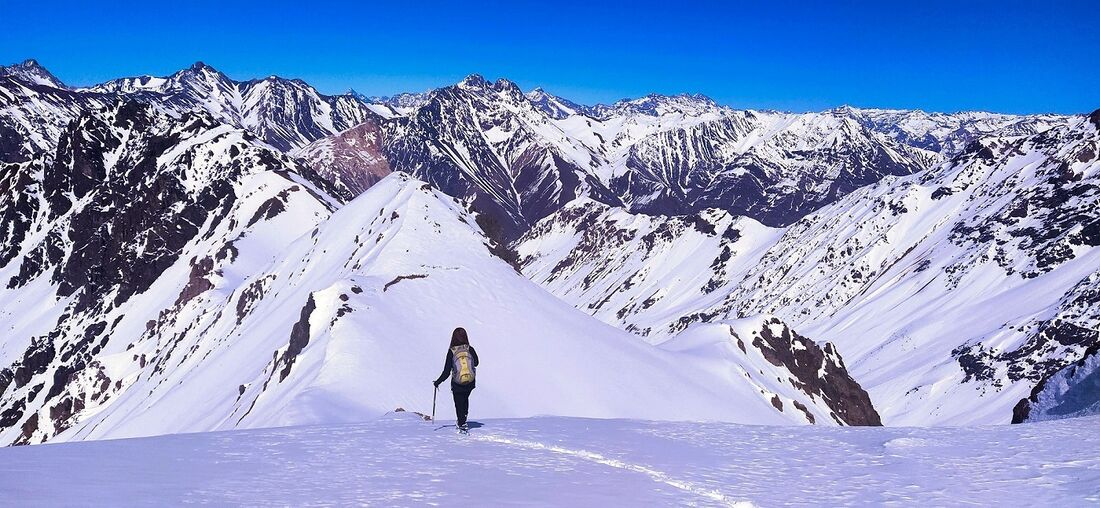

Nada mal, ahora sigamos con el análisis, veamos cual es el promedio y la mediana de la `Exigencia física` de los trekking

In [48]:
dff["Exigencia física"].mean(),dff["Exigencia física"].median()

(7.196969696969697, 5.5)

**WOW**

Las aventuras que he realizado están sobre el promedio y la mediana, entonces puedo decir que tengo nivel superior a lo general ¡Bien! 🚀



Entonces finalmente para responder como se mide la dificultad de una aventura se utiliza la métrica de ***Dopihoras***, se puede decir que a mayor valor de este estimador mayor difucultad tanto su duración, desnivel y distancia.

Bueno lector este no es el fin sino un comienzo para tus aventuras y su entendimiento, entoces dime ¿Cuál es tu futura aventura?